In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os,sys
from PIL import Image
import pathlib


In [ ]:
img_dir = 'C:/Users/lenovo/Desktop/tomato'
categories = ['토마토 궤양병', '토마토 녹용애', '토마토 담배가루이', '토마토 시들음병', '토마토 아메리카잎굴파리', '토마토 아메리카잎굴파리 (ROI)', '토마토 오이모자이크바이러스', '토마토 잎곰팡이병', '토마토 점무늬병', '토마토 정상', '토마토 줄기속썩음병', '토마토 차먼지응애', '토마토 청벌레', '토마토 토마토퇴록바이러스', '토마토 황화말림바이러스', '토마토 흰가루병']
np_classes = len(categories)

image_w = 516
image_h = 516


pixel = image_h * image_w * 3

X = []
y = []

for cat in categories:
    img_dir_detail = img_dir  +"/"+ cat
    files = glob.glob(img_dir_detail+"/*.png")



    X.append(files)
data_dir = pathlib.Path(img_dir)



In [ ]:
print(data_dir)

C:\Users\lenovo\Desktop\tomato


In [ ]:
batch_size = 64
img_height = 500
img_width = 500
answer = sum(X, [])

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4386 files belonging to 16 classes.
Using 3509 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4386 files belonging to 16 classes.
Using 877 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['토마토 궤양병', '토마토 녹용애', '토마토 담배가루이', '토마토 시들음병', '토마토 아메리카잎굴파리', '토마토 아메리카잎굴파리 (ROI)', '토마토 오이모자이크바이러스', '토마토 잎곰팡이병', '토마토 점무늬병', '토마토 정상', '토마토 줄기속썩음병', '토마토 차먼지응애', '토마토 청벌레', '토마토 토마토퇴록바이러스', '토마토 황화말림바이러스', '토마토 흰가루병']


C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48268 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50500 missing 

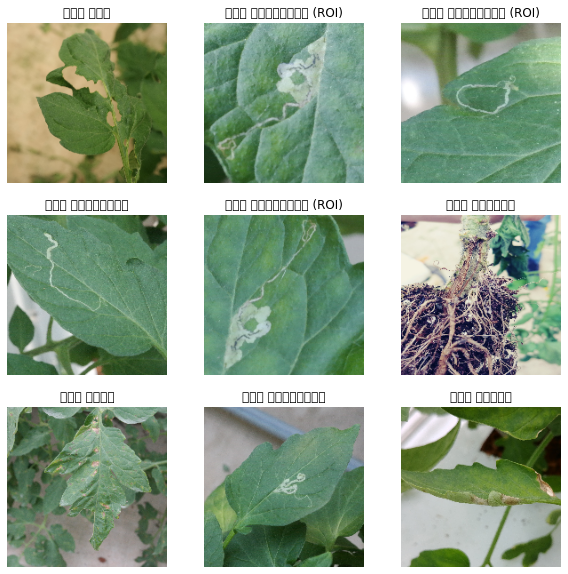

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 500, 500, 3)
(64,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.06023485 0.89737254


In [ ]:
num_classes = 16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 500, 500, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
55/55 [==============================] - 708s 13s/step - loss: 3.8074 - accuracy: 0.2983 - val_loss: 1.5051 - val_accuracy: 0.4971
Epoch 2/10
55/55 [==============================] - 557s 10s/step - loss: 1.2629 - accuracy: 0.6059 - val_loss: 1.0177 - val_accuracy: 0.6534
Epoch 3/10
55/55 [==============================] - 540s 10s/step - loss: 0.5917 - accuracy: 0.8255 - val_loss: 0.7666 - val_accuracy: 0.7514
Epoch 4/10
55/55 [==============================] - 534s 10s/step - loss: 0.1942 - accuracy: 0.9435 - val_loss: 0.7265 - val_accuracy: 0.7913
Epoch 5/10
55/55 [==============================] - 552s 10s/step - loss: 0.0827 - accuracy: 0.9780 - val_loss: 0.7661 - val_accuracy: 0.8084
Epoch 6/10
55/55 [==============================] - 573s 10s/step - loss: 0.0173 - accuracy: 0.9970 - val_loss: 0.7909 - val_accuracy: 0.8096
Epoch 7/10
55/55 [==============================] - 543s 10s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.8692 - val_accuracy: 0.8164
Epoch 

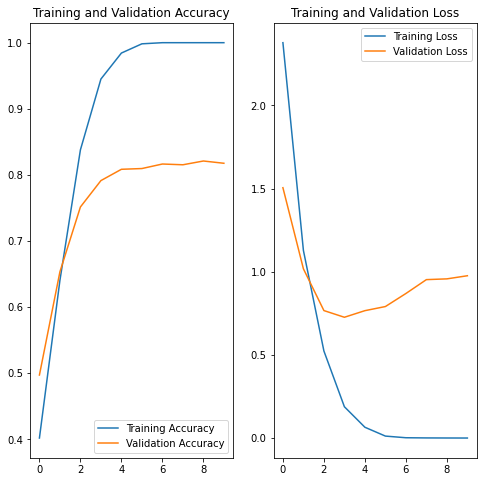

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

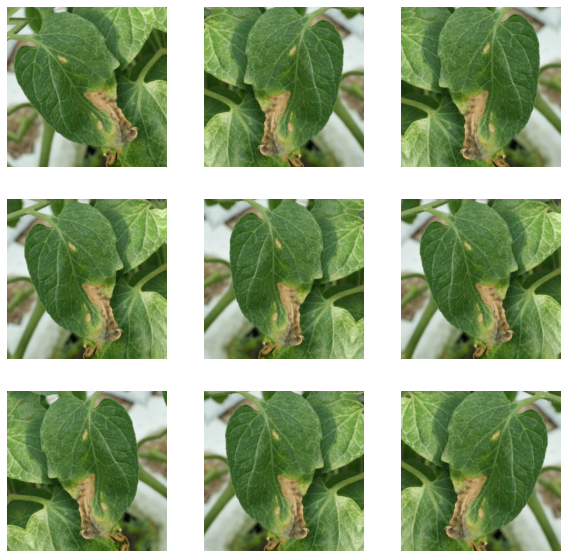

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
110/110 [==============================] - 72s 647ms/step - loss: 1.7973 - accuracy: 0.4167 - val_loss: 1.2940 - val_accuracy: 0.5587
Epoch 2/30
110/110 [==============================] - 72s 658ms/step - loss: 1.1281 - accuracy: 0.6138 - val_loss: 1.1786 - val_accuracy: 0.5906
Epoch 3/30
110/110 [==============================] - 72s 654ms/step - loss: 0.9039 - accuracy: 0.6878 - val_loss: 0.8614 - val_accuracy: 0.7070
Epoch 4/30
110/110 [==============================] - 73s 661ms/step - loss: 0.8114 - accuracy: 0.7245 - val_loss: 0.7976 - val_accuracy: 0.7172
Epoch 5/30
110/110 [==============================] - 74s 673ms/step - loss: 0.6881 - accuracy: 0.7658 - val_loss: 0.8526 - val_accuracy: 0.6978
Epoch 6/30
110/110 [==============================] - 73s 667ms/step - loss: 0.5750 - accuracy: 0.7972 - val_loss: 0.5605 - val_accuracy: 0.8062
Epoch 7/30
110/110 [==============================] - 73s 661ms/step - loss: 0.4679 - accuracy: 0.8383 - val_loss: 0.8048 - val_ac

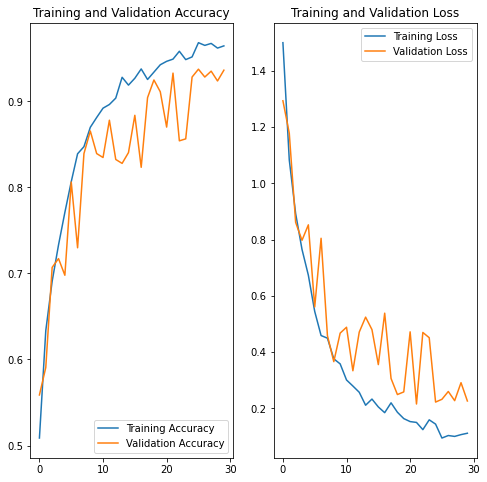

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#files2 = os.PathLike("C:/Users/lenovo/Desktop/tes")


In [ ]:
data_dir2 = pathlib.Path("C:/Users/lenovo/Desktop/tes/unnamed (1).jpg")

In [ ]:
img = keras.preprocessing.image.load_img(
    data_dir2, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(100*np.array(score))

This image most likely belongs to 토마토 청벌레 with a 95.82 percent confidence.
[1.9662345e-02 1.2827580e-04 7.0663140e-04 1.3376796e-01 4.0231137e+00
 2.5157520e-04 4.1282368e-07 1.5438451e-04 3.1535521e-06 3.5640930e-08
 2.2231903e-17 2.8997480e-05 9.5819237e+01 4.7728037e-05 2.8859568e-03
 1.0046638e-05]
